In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
%run Methods.ipynb

test_prepData (__main__.TestDataPrep) ... ok
test_withNA (__main__.TestDataPrep) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.036s

OK


In [2]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")

In [5]:
def plottingFuncLine(ax, year, plotDict):
    for country in plotDict.keys():
        ax.plot(year, plotDict[country], label = country)
    

KeyError: 'Yield'

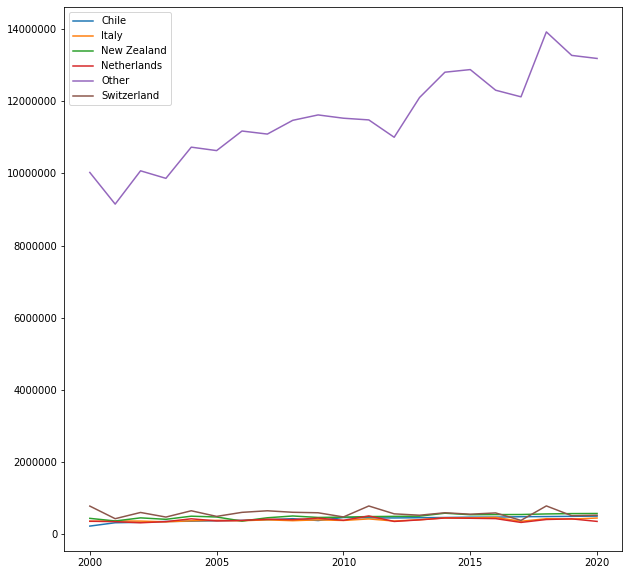

In [7]:
plotProductionCrop(agData, "Yield", "Apples", 2000, 2020, 5, plottingFuncLine)